In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

sns.set()

In [2]:
parquet_file = 'TCV_LHD_db4ML.parquet.part'
df = pd.read_parquet(parquet_file, engine ='auto')

In [3]:
print(df.head())
print('----------oooo0000oooo----------')
print(df.info())

     time            IP        PD           FIR   WP        LDH  pulse
0  0.0206  30409.787109  1.816398  4.077222e+18  0.0  Ip<Ip_MIN    1.0
1  0.0207  30882.741994  1.992211  4.092746e+18  0.0  Ip<Ip_MIN    1.0
2  0.0208  31355.696879  2.016582  4.116485e+18  0.0  Ip<Ip_MIN    1.0
3  0.0209  31856.508747  1.943354  4.101001e+18  0.0  Ip<Ip_MIN    1.0
4  0.0210  32357.321558  1.860389  4.185470e+18  0.0  Ip<Ip_MIN    1.0
----------oooo0000oooo----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615471 entries, 0 to 2615470
Data columns (total 7 columns):
 #   Column  Dtype   
---  ------  -----   
 0   time    float64 
 1   IP      float64 
 2   PD      float64 
 3   FIR     float64 
 4   WP      float64 
 5   LDH     category
 6   pulse   float64 
dtypes: category(1), float64(6)
memory usage: 122.2 MB
None


In [4]:
df.describe()

,time,IP,PD,FIR,WP,pulse
count,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06
mean,8.427632e-01,-1.670041e+05,1.905961e+00,3.054001e+19,9.269129e+03,8.747921e+01
std,5.341768e-01,1.460525e+05,1.537137e+00,1.550879e+19,6.557237e+03,5.027538e+01
min,9.800076e-03,-4.633848e+05,0.000000e+00,-6.358192e+19,-1.856671e+04,1.000000e+00
25%,3.960001e-01,-2.214231e+05,8.275470e-01,2.038334e+19,4.832910e+03,4.500000e+01
50%,7.846002e-01,-1.779653e+05,1.508994e+00,2.872705e+19,7.645989e+03,8.600000e+01
75%,1.236000e+00,-1.422717e+05,2.565994e+00,3.901274e+19,1.321019e+04,1.310000e+02
max,2.575000e+00,5.219116e+05,1.000000e+01,1.196714e+20,4.367435e+04,1.720000e+02


In [5]:
df['LDH'].values

['Ip<Ip_MIN', 'Ip<Ip_MIN', 'Ip<Ip_MIN', 'Ip<Ip_MIN', 'Ip<Ip_MIN', ..., 'L', 'L', NaN, 'Ip<Ip_MIN', 'Ip<Ip_MIN']
Length: 2615471
Categories (4, object): ['Ip<Ip_MIN' < 'L' < 'D' < 'H']

In [6]:
#df.dropna(inplace=True)
#df.drop(df[df['LDH']  == 'Ip<Ip_MIN'].index, inplace = True)
#df_filter = df[ df['LDH'] != 'Ip<Ip_MIN']

mask = df['LDH'] == 'Ip<Ip_MIN'
df_filter = df.dropna()
df_filter = df.drop(index = df[mask].index)
df_filter = df_filter.reset_index(drop=True)

discard_data = len(df.index) - len(df_filter.index) # number of data point that do not contain useful information
print('number of useless data points: ', discard_data)
print('size of original data set: ', len(df.index))
print('size of filtered data set: ', len(df_filter.index))

print(len(df_filter.index) + discard_data - len(df.index))

df.describe()

number of useless data points:  56371
size of original data set:  2615471
size of filtered data set:  2559100
0


,time,IP,PD,FIR,WP,pulse
count,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06,2.615471e+06
mean,8.427632e-01,-1.670041e+05,1.905961e+00,3.054001e+19,9.269129e+03,8.747921e+01
std,5.341768e-01,1.460525e+05,1.537137e+00,1.550879e+19,6.557237e+03,5.027538e+01
min,9.800076e-03,-4.633848e+05,0.000000e+00,-6.358192e+19,-1.856671e+04,1.000000e+00
25%,3.960001e-01,-2.214231e+05,8.275470e-01,2.038334e+19,4.832910e+03,4.500000e+01
50%,7.846002e-01,-1.779653e+05,1.508994e+00,2.872705e+19,7.645989e+03,8.600000e+01
75%,1.236000e+00,-1.422717e+05,2.565994e+00,3.901274e+19,1.321019e+04,1.310000e+02
max,2.575000e+00,5.219116e+05,1.000000e+01,1.196714e+20,4.367435e+04,1.720000e+02


In [7]:
df_filter.head()

,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0


In [8]:
keys = df_filter.keys().to_numpy()
number_wrong_data = np.zeros(len(keys) -1 )
counter = 0
for key in keys[1:]:
    number_wrong_data[counter] = (df_filter[key] == 'Ip<Ip_MIN').mean()
    counter = counter + 1

print(keys[6])

pulse


In [9]:
print(number_wrong_data)
print(keys[1:])
df_filter.head()

[0. 0. 0. 0. 0. 0.]
['IP' 'PD' 'FIR' 'WP' 'LDH' 'pulse']


,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0


In [10]:
df_filter['LDH'].values
(df_filter['LDH'] == 'Ip<Ip_MIN').mean() # to test Ip<Ip_MIN is actually dropped

0.0

In [11]:
df_filter.keys()
df_filter['LDH'].values.dropna()

['L', 'L', 'L', 'L', 'L', ..., 'L', 'L', 'L', 'L', 'L']
Length: 2558179
Categories (4, object): ['Ip<Ip_MIN' < 'L' < 'D' < 'H']

In [16]:
len(df_filter.index)*0.01

25591.0

In [17]:
## this plot is really time-consuming

#percent_data_plots = 0.01
#number_rows = len(df_filter.index)
#sample_size = int( number_rows * percent_data_plots )
#sample = df_filter.sample(10000) # data sample picked at random
#sns.pairplot(sample, diag_kind='kde',hue = 'LDH', markers=["D", "o", "o", "o"])

In [18]:
print(sample_size)
print(sample['LDH'].values)
#variable = 'FIR'
#sns.relplot(x = variable, y = 'LDH', hue = 'LDH', data = df_filter) # relational plot

NameError: name 'sample_size' is not defined

[None, None, None, None, None, None, None, None, None, None, None, None]

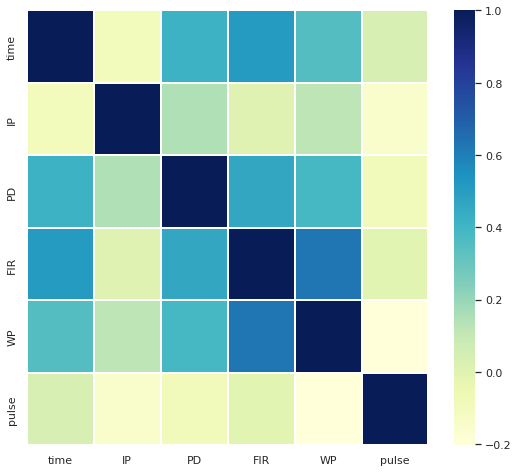

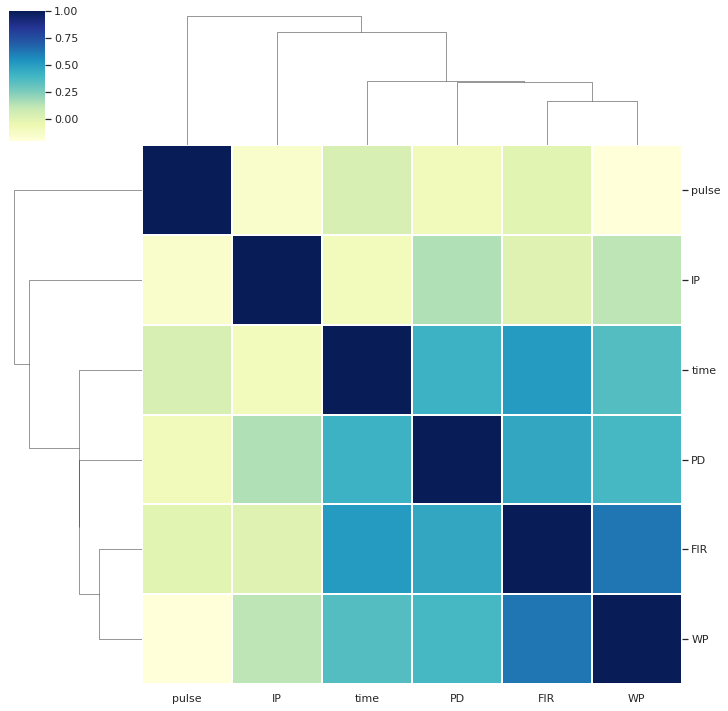

In [19]:
# correlation matrices

corrmat = df_filter.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

In [21]:
# plot of each feature vs labels
df_filter_number_labels = 
ax1 = df_filter.plot.scatter(x='LDH', y='PD', c='DarkBlue')

#plt.plot(df_filter['LDH'], ls = 'none', marker = 'x')

SyntaxError: invalid syntax (634794734.py, line 2)

In [22]:
df_filter.keys()

Index(['time', 'IP', 'PD', 'FIR', 'WP', 'LDH', 'pulse'], dtype='object')

In [23]:
features = df_filter.keys().to_numpy()
mask_features = features != 'LDH'
features = features[mask_features]

In [24]:
### PCA computation
features = df_filter.keys().to_numpy()
# ['time' 'IP' 'PD' 'FIR' 'WP' 'LDH' 'pulse']
print(features)
mask = np.array([False, True, True, True, False, False, True ])
print(features[mask])

['time' 'IP' 'PD' 'FIR' 'WP' 'LDH' 'pulse']
['IP' 'PD' 'FIR' 'pulse']


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# features 
features = df_filter.keys().to_numpy()
#mask_features_1 = features != 'LDH'
# we remove time, WP, and LDH 
mask_features = np.array([False, True, True, True, False, False, True ])

features = features[mask_features]
print('features in PCA computation', features)

#separate features
x = df_filter.loc[:, features].values
y = df_filter.loc[:,['LDH']].values
x = StandardScaler().fit_transform(x) # Standardizing the features
print(x.shape) # dimension of features
print(y.shape) # dimension of labels

features in PCA computation ['IP' 'PD' 'FIR' 'pulse']
(2559100, 4)
(2559100, 1)


In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_filter[['LDH']]], axis = 1)

In [27]:
finalDf.head()

,principal component 1,principal component 2,LDH
0,-0.366094,-2.791052,L
1,-0.355866,-2.790413,L
2,-0.253677,-2.772770,L
3,-0.313556,-2.783385,L
4,-0.326491,-2.786345,L


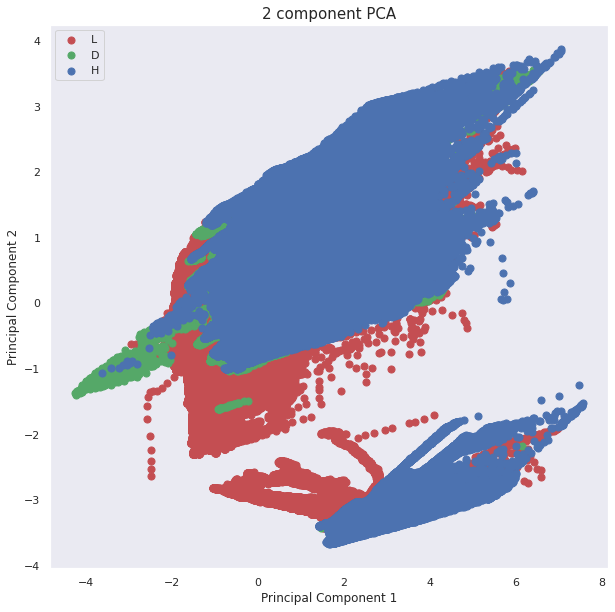

In [28]:
# PCA visualialization
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)
targets = ['L', 'D', 'H',] # labels to predict
colors = ['r', 'g', 'b',]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LDH'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [29]:
df_filter.head()

,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0


In [30]:
df_filter['WP'].describeibe()

AttributeError: 'Series' object has no attribute 'describeibe'

In [31]:
data_frame = df_filter.copy()
data_frame['LDH'] = np.where(data_frame['LDH'] == 'L', 0)

ValueError: either both or neither of x and y should be given

In [29]:
data_frame.head()

,time,IP,PD,FIR,WP,LDH,pulse
0,0.0257,50076.167327,1.796861,5.006723e+18,0.0,L,1.0
1,0.0258,50372.816198,1.816465,5.024210e+18,0.0,L,1.0
2,0.0259,50640.227687,2.031274,5.114125e+18,0.0,L,1.0
3,0.0260,50907.639176,1.894527,5.160487e+18,0.0,L,1.0
4,0.0261,51078.462437,1.865220,5.162926e+18,0.0,L,1.0
